In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Load the customer segmentation dataset.

In [5]:
df = pd.read_csv('Cust_Segmentation.csv')
df.head(15)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
5,6,40,1,23,81,0.998,7.831,NaN,NBA016,10.9
6,7,38,2,4,56,0.442,0.454,0.0,NBA013,1.6
7,8,42,3,0,64,0.279,3.945,0.0,NBA009,6.6
8,9,26,1,5,18,0.575,2.215,NaN,NBA006,15.5
9,10,47,3,23,115,0.653,3.947,0.0,NBA011,4.0


# 2. Clean the data by removing any duplicates, and missing values.

In [6]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [7]:
df.head(10)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
6,7,38,2,4,56,0.442,0.454,0.0,NBA013,1.6
7,8,42,3,0,64,0.279,3.945,0.0,NBA009,6.6
9,10,47,3,23,115,0.653,3.947,0.0,NBA011,4.0
10,11,44,3,8,88,0.285,5.083,1.0,NBA010,6.1
12,13,24,1,7,18,0.526,0.643,0.0,NBA000,6.5


In [8]:
df.drop(['Customer Id' , 'Address'],axis=1,inplace=True)

In [9]:
df.head(10)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2
6,38,2,4,56,0.442,0.454,0.0,1.6
7,42,3,0,64,0.279,3.945,0.0,6.6
9,47,3,23,115,0.653,3.947,0.0,4.0
10,44,3,8,88,0.285,5.083,1.0,6.1
12,24,1,7,18,0.526,0.643,0.0,6.5


# 3. Preprocess the data by scaling the features to ensure they are on the same scale. You can use standardization or normalization techniques for this step.

In [10]:
# Instantiate the scaler
scaler = MinMaxScaler()
columns = ['Income', 'Card Debt','Other Debt','DebtIncomeRatio']
# Scale the features
df[columns] = scaler.fit_transform(df[columns])
print(df[columns])

       Income  Card Debt  Other Debt  DebtIncomeRatio
0    0.011574   0.005450    0.038054         0.144254
1    0.199074   0.222395    0.302801         0.303178
2    0.099537   0.296803    0.213280         0.501222
3    0.011574   0.032556    0.017415         0.144254
4    0.553241   0.452382    0.328368         0.166259
..        ...        ...         ...              ...
844  0.067130   0.033189    0.042686         0.097800
846  0.046296   0.016886    0.073181         0.161369
847  0.009259   0.135773    0.117237         0.806846
848  0.032407   0.005061    0.024085         0.061125
849  0.115741   0.090223    0.133096         0.200489

[700 rows x 4 columns]


# 4. Select the relevant features that are most important in determining customer behavior.

In [11]:
# Step 4: Select relevant features
selected_features = ['Age', 'Years Employed', 'Income','Card Debt',	'Other Debt', 'DebtIncomeRatio']

df_selected = df[selected_features]
df_selected.head()

,Age,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,41,6,0.011574,0.005450,0.038054,0.144254
1,47,26,0.199074,0.222395,0.302801,0.303178
2,33,10,0.099537,0.296803,0.213280,0.501222
3,29,4,0.011574,0.032556,0.017415,0.144254
4,47,31,0.553241,0.452382,0.328368,0.166259


# 5. Apply K-means clustering to the preprocessed and selected features to identify customer segments with similar behavior and demographics. Choose the optimal number of clusters using techniques like the elbow method.

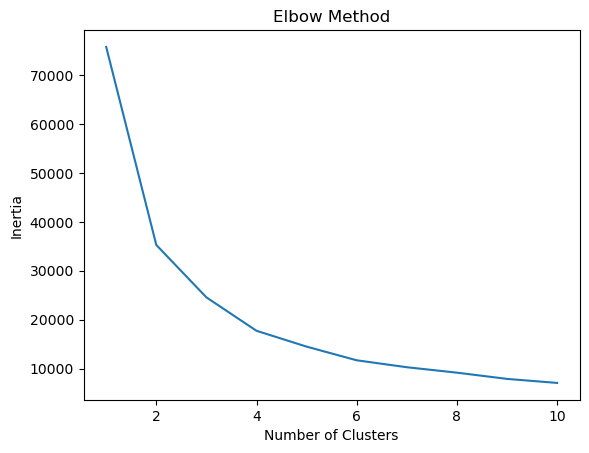

KMeans(n_clusters=5, random_state=42)

In [12]:
SSE = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_selected)
    SSE.append(kmeans.inertia_)
    
plt.plot(range(1, 11), SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_selected)


# 6. Visualize the resulting clusters using techniques like scatter plots.

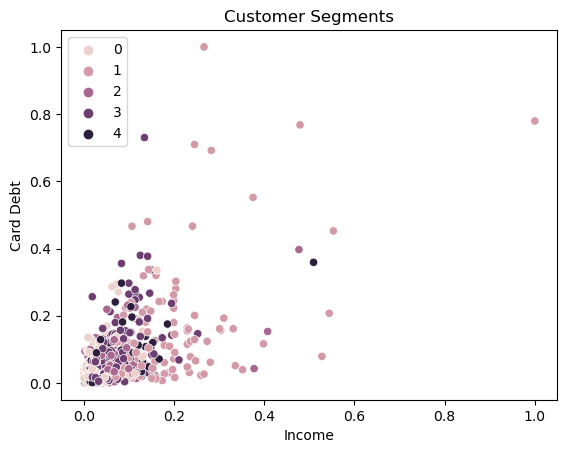

In [13]:
sns.scatterplot(x='Income', y='Card Debt', hue=kmeans.labels_, data=df_selected)
plt.title('Customer Segments')
plt.xlabel('Income')
plt.ylabel('Card Debt')
plt.show()

Q1. When should we split the data into training and testing sets when using K-means clustering,
and why?

Although K-means clustering does not require a target variable, we can still evaluate its performance by comparing the clustering results on different parts of the data. Hence, we can split the data into training and testing sets, where the testing set is used to assess the accuracy of the clustering algorithm. By comparing the clustering results on both sets, we can check if the algorithm is overfitting or underfitting the data and adjust the parameters accordingly. So, even though splitting the data into training and testing sets serves different purposes in supervised and unsupervised learning, it is still helpful for evaluating the performance of clustering algorithms.

Q2. Why do we need to scale the features before performing K-means clustering ?

K-means clustering is a method that groups data points based on their distances from each other. However, when features are on different scales, the distance calculations may favour features with larger scales. This can lead to bias in the clustering towards those features. To ensure equal weighting and fairness in the distance calculations, it is important to scale the features to the same size. This ensures that all features contribute equally to the distance calculations and prevents bias towards any particular feature. Therefore, feature scaling is a crucial step in K-means clustering to ensure accurate and unbiased clustering results.